# DSC 10 Discussion Week 8

<img src="data/panda_baby.jpg" width="500">

# Bootstrapping - sampling within a sample
- Problem : statistics about the data population are often unavailable, costly to acquire, unknown, etc.
- Solution : utilize random sampling (and re-sampling) of available data to estimate population statistics
    - The result of bootstrapping will be a distribution over sample statistics!
    - Hopefully we'll see that these *sample statistics* $\approx$ *population statistics*
    
### Bootstrapping basic procedure
- Sample from the population
- Re-sample from that same sample (make sure to have replace=True!)
- Repeat
- **Note** - after re-sampling, we will likely see duplicate data entries within a single sample, but that's okay! 
    - If we didn't have duplicates, then we would have the same exact data in every single sample (this would be bad!)

# Bootstrapped Confidence Intervals
- Goal : return a range of values that we are confident contain the true population statistic 
    - Bootstrapping gives us a distribution of sample statistics
    - The true population statistic often lies within the bulk of that distribution 
- $X$% confidence interval 
    - Interpretation
        - **YES**: $X$% of all bootstrapped sample statistics fall within that interval
        - **YES**: ~$X$% of the time, the interval will capture the correct population statistic
        - **YES**: I'm $X$% sure that the true population statistic is in the interval
        - **NO**: the true population statistic has an $X$% change of being in the interval
    - Computation
        - Use $\frac{100-X}{2}$ and $100-\frac{100-X}{2}$ for lower and upper percentiles
        
### CIs for testing
- Given P-value $p$ and null hypothesis "population statistic = $a$":
    - Construct $(100-p)$ CI for populatiton statistic
    - Reject null hypothesis if $a$ is not in the interval

# Describing a Distribution : Mean and Spread
- Center of a distribution 
    - *Mean* : balance point
    - *Median* : half-way point (robust to outliers) 
- Spread of distribution 
    - *Range* : biggest - smallest
    - *Standard deviation* : variability around the mean
- Chebyshev's Inequality
    - Proportion of values in the range "average $\pm\ z$ SDs" is ≥ $1-\frac{1}{z^2}$
- Looking forward
    - We'll look at other types of distributions and ones that can be parameterized 

#### Extra
- You can find additional help on these topics in the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html).
- [Here](https://ucsd-ets.github.io/dsc10-2020-fa/published/default/reference/babypandas-reference.pdf) is a pointer to that reference sheet we saw last time.

In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import otter
grader = otter.Notebook()

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
    "livereveal", {
        'width': 1500,
        'height': 700,
        "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; background-color: #dff0d8; border-color: #d6e9c6;">

# RECALL FROM LAST WEEK
    
Quick outline
- data : life expectancy 
- population : all countries
- sample : smaller random selection of countries
- visualizations : histograms of life expectancy data and mean
    
</div>

## Life expectancy data

This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [2]:
# load in all the data
life_expectancy = bpd.read_csv("data/Life Expectancy Data.csv")

# choose only data from 2015
recent_data = life_expectancy[life_expectancy.get("Year") == 2015]

recent_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [3]:
# compute population mean to compare

pop_mean = recent_data.get('Life expectancy ').mean()
pop_mean

71.61693989071036

# Quick recap about sampling!

Here we'll take a look at the same life expectancy data and do some sampling exercises.

In [4]:
# Let's visualize our population distribution.

# Defining a function to create bins easily
def get_bins(array, bin_size=1):
    smallestNum = int(array.min())
    
    largestNum = int(array.max())
    upperLimit = largestNum + bin_size + 1
    
    return np.arange(smallestNum, upperLimit, bin_size)

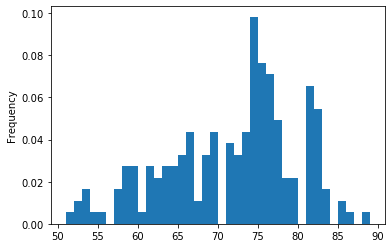

In [5]:
measured = recent_data.get("Life expectancy ")

#generate number of bins
n_bins = get_bins(measured, 1) # <-- Try playing around with the bin size

#lets plot the histogram
recent_data.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

## POPULATION DISTRIBUTION
- life expectancy of all countries in our POPULATION (entire dataset)

In [6]:
# different sample sizes

num_samples = 10

# num_samples = 40

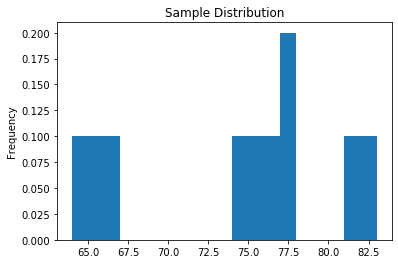

In [7]:
# How do we create a representative sample?
collected = recent_data.sample(n=num_samples, replace=False)

#we need new bin sizes
n_bins = get_bins(collected.get('Life expectancy '),1)


#lets plot the histogram
plt.title("Sample Distribution")
collected.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)
# plt.show()

## SAMPLE DISTRIBUTION
- life expectancy of all countries in our SAMPLE (random selection of 15 countries)

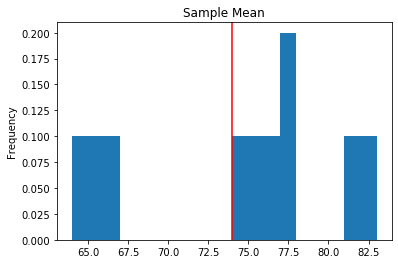

In [8]:
sample_mean = collected.get('Life expectancy ').mean()
sample_mean

# We can show our mean in relation to the sample:

#plot the historgram again
collected.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

#draw the sample mean
plt.title("Sample Mean")
plt.axvline(sample_mean, c='r')
# plt.show()

## SAMPLE MEAN
- **mean** life expectancy of all countries in our SAMPLE (random selection of 40 countries)

The resampled mean is:		 75.26 
Compared to the original:	 74.00000000000001


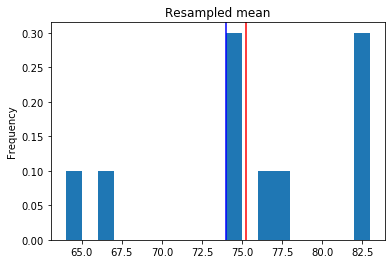

In [9]:
# Run this multiple time to see what changes.

resampled = collected.sample(num_samples,replace=True)
resampled_mean = resampled.get('Life expectancy ').mean()
n_bins = get_bins(collected.get('Life expectancy '), 1)

print("The resampled mean is:\t\t", resampled_mean, "\nCompared to the original:\t", sample_mean)

#plot the historgram again
resampled.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

#lets show the sampled_mean and resampled_mean
plt.title("Resampled mean")
plt.axvline(resampled_mean, c='r')
plt.axvline(sample_mean, c='b')
# plt.show()

## RESAMPLED MEAN
- **mean** life expectancy of all countries in our NEW SAMPLE

In [10]:
# bootstrapping loop

sample_means = np.array([])

for i in range(1000):
    bootstrapped = collected.sample(num_samples,replace=True)
    boot_mean = bootstrapped.get('Life expectancy ').mean()
    sample_means = np.append(sample_means, boot_mean)

(array([  0.,   1.,   2.,   4.,   3.,   6.,  18.,  26.,  39.,  51.,  72.,
         73.,  99., 122.,  78.,  84.,  88.,  69.,  71.,  41.,  22.,  19.,
          8.,   3.,   1.,   0.]),
 array([67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. ,
        72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5,
        78. , 78.5, 79. , 79.5, 80. ]),
 <a list of 26 Patch objects>)

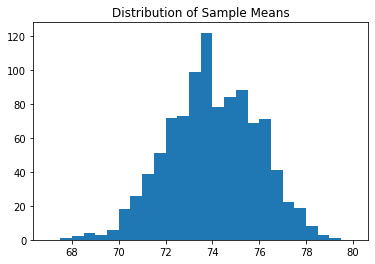

In [11]:
plt.title("Distribution of Sample Means")
plt.hist(sample_means, bins=get_bins(sample_means, 0.5))
# plt.show()

## DISTRIBUTION OF SAMPLE MEANS
- distribution of **mean** life expectancy from 1000 different samples (bootstrapping!)

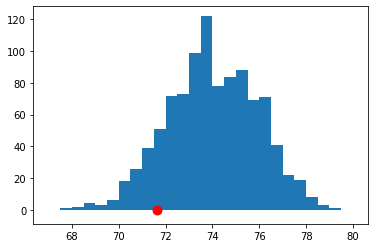

In [12]:
plt.hist(sample_means, bins=get_bins(sample_means, 0.5))
plt.scatter(pop_mean, 0, color='red', s=80).set_zorder(2)

## POPULATION MEAN TOO
- comparing population mean to the distribution of sample means

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; background-color: #dff0d8; border-color: #d6e9c6;">

### Everything above should hopefully be familiar from last week
- if not [here](https://ucsd.zoom.us/rec/play/FNbiilaGa1BNkSAKGdIAIuBtvTMnua2wyZGWCKZ7SEj1l426mV18AkgUHnFTMypCepd5t5mm8cD85Ukp.dSsb2q67ubzlcB55?startTime=1605664878000&_x_zm_rtaid=0Oagfxv1TH6w3vwvZqPTbQ.1606170859635.ea29f4b90ffe94632dd6376dbf87eb23&_x_zm_rhtaid=235) is a link to last week's discussion!

</div>

# So now what? 

- What conclusions can we make about the **population mean** based on our distribution of sample means?

# Confidence Intervals

- We would like to come up with a range of values that contain X% of all bootstrapped sample means. 
- This interval corresponds to an X% confidence interval

### How to do this?
- We need our array of sample means and we need to compute a few percentiles based on what X% confidence interval we'd like to return

# Question 1 
Suppose we'd like to construct 90% and 82% Confidence Intervals over some statistic.

What are the upper and lower percentiles we need in each case?

In [13]:
# compute the lower percentile given a confidence interval
def compute_lower_percentile(perc_conf):
    
    lower_perc = (100-perc_conf)/2 # SOLUTION
    
    return lower_perc

# compute the upper percentile given a confidence interval
def compute_upper_percentile(perc_conf):
    
    upper_perc = 100 - (100-perc_conf)/2 # SOLUTION
    
    return upper_perc

In [14]:
lower_perc_90 = compute_lower_percentile(90) # SOLUTION
print(f"Lower percentile for 90% C.I. : {lower_perc_90}")

upper_perc_90 = compute_upper_percentile(90) # SOLUTION
print(f"Upper percentile for 90% C.I. : {upper_perc_90}")

Lower percentile for 90% C.I. : 5.0
Upper percentile for 90% C.I. : 95.0


In [15]:
lower_perc_82 = compute_lower_percentile(82) # SOLUTION
print(f"Lower percentile for 82% C.I. : {lower_perc_82}")

upper_perc_82 = compute_upper_percentile(82) # SOLUTION
print(f"Upper percentile for 82% C.I. : {upper_perc_82}")

Lower percentile for 82% C.I. : 9.0
Upper percentile for 82% C.I. : 91.0


# Question 2 

Which of the two confidence intervals (90% or 82%) is larger? Why?

In [17]:
# choose 90 or 82
 
larger_ci = 90 # SOLUTION

# BEGIN SOLUTION
reason = "width increases with confidence."
reason = "100% C.I. includes entire distribution."
reason = "lower percentile is lower and higher percentile is higher."
reason = "area under curve of distribution is larger."
# END SOLUTION

# Question 3

Compute the upper and lower bounds of a 95% confidence interval for our ```sample_means``` data from above.

In [18]:
def compute_ci(confidence_level, sample_means):

    # What is the mean we're estimating?
    mean = np.mean(sample_means) # SOLUTION

    # What are the percentiles?
    # Use the functions we made above
    lower_perc = compute_lower_percentile(confidence_level) # SOLUTION
    upper_perc = compute_upper_percentile(confidence_level) # SOLUTION

    # And then our lower and upper bounds?
    lower_bound = np.percentile(sample_means, lower_perc) # SOLUTION
    upper_bound = np.percentile(sample_means, upper_perc) # SOLUTION

    # Printing it out so we can easily see our results.
    print("""
    Mean:\t{}

    Lower Percentile:\t{}
    Upper Percentile:\t{}

    Lower Bound:\t{}
    Upper Bound:\t{}

    Confidence Level:\t{}%
    """.format(mean, lower_perc, upper_perc, lower_bound, upper_bound, confidence_level))
    
    return lower_bound, upper_bound

In [19]:
confidence_level = 95 # SOLUTION

# compute the ci
lower_bound, upper_bound = compute_ci(confidence_level, sample_means) # SOLUTION


    Mean:	73.99269

    Lower Percentile:	2.5
    Upper Percentile:	97.5

    Lower Bound:	70.2195
    Upper Bound:	77.5605

    Confidence Level:	95%
    


### Lets visualize the confidence interval on the histogram from earlier

In [20]:
def plot_ci(ci, lower_bound, upper_bound, sample_means, pop_mean):
    plt.title(f"{ci}% confidence interval")
    plt.hist(sample_means, bins=get_bins(sample_means, 0.5))
    plt.scatter(pop_mean, 0, color='red', s=80).set_zorder(3)
    plt.plot([lower_bound, upper_bound], [0,0], color='lime', linewidth=4, zorder=2)
    plt.show()

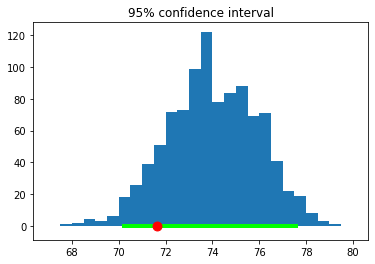

In [21]:
plot_ci(confidence_level, lower_bound, upper_bound, sample_means, pop_mean)

# Question 4

Interpret what the confidence interval means in the context of this problem. 

In [22]:
# BEGIN SOLUTION 
interpretation = f"We are 95% confident that the mean life expectancy is between {lower_bound} and {upper_bound} years"
# END SOLUTION

# Question 5

Compute 100%, 80%, and 50% confidence intervals using the same ```sample_means``` and visualize the results of each.

In [23]:
# compute the bounds
print("100% CI")
lower_100, upper_100 = compute_ci(100, sample_means) # SOLUTION

print("80% CI")
lower_80, upper_80 = compute_ci(80, sample_means) # SOLUTION 

print("50% CI")
lower_50, upper_50 = compute_ci(50, sample_means) # SOLUTION

100% CI

    Mean:	73.99269

    Lower Percentile:	0.0
    Upper Percentile:	100.0

    Lower Bound:	67.68
    Upper Bound:	79.43

    Confidence Level:	100%
    
80% CI

    Mean:	73.99269

    Lower Percentile:	10.0
    Upper Percentile:	90.0

    Lower Bound:	71.51800000000001
    Upper Bound:	76.46100000000001

    Confidence Level:	80%
    
50% CI

    Mean:	73.99269

    Lower Percentile:	25.0
    Upper Percentile:	75.0

    Lower Bound:	72.70500000000001
    Upper Bound:	75.39000000000001

    Confidence Level:	50%
    


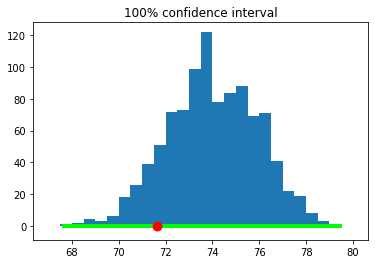

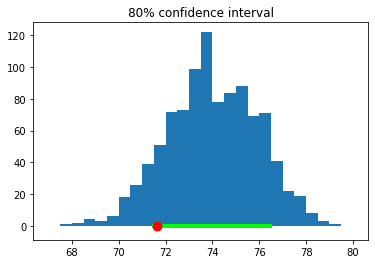

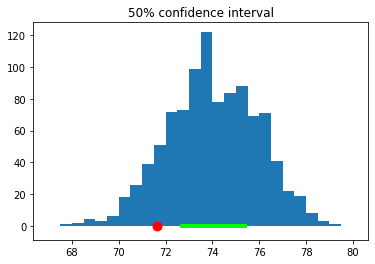

In [24]:
# visualize the results
plot_ci(100, lower_100, upper_100, sample_means, pop_mean)
plot_ci(80, lower_80, upper_80, sample_means, pop_mean)
plot_ci(50, lower_50, upper_50, sample_means, pop_mean)

# Question 6

Do any of the above confidence intervals (100%, 95%, 80%, 50%) NOT contain the true population mean?

In [25]:
pop_mean

71.61693989071036

In [26]:
# answer True or False
exists_interval = (lower_50 > pop_mean) or (upper_50 < pop_mean) # SOLUTION
exists_interval

True

# Question 7

Is it possible for the 80% confidence interval to contain the true population mean while the 95% confidence interval does not?

In [27]:
# answer True or False
possible = False # SOLUTION
possible

False